In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
fv = pd.read_csv("fvid2018.csv", skiprows = [1], engine = "python")
mv = pd.read_csv("mvid2018.csv", engine = "python")
lat = 0.504725
lon = 1.942737
alt = 101
mes = ["Enero","Febrero","Marzo","Abril","Mayo","Junio","Julio","Agosto","Septiembre","Octubre","Noviembre","Diciembre"]

In [3]:
mv = mv.dropna(axis= 0,how = "all", thresh = None, subset = None, inplace = False)
mv["albedo_Avg"] = mv["albedo_Avg"].apply(pd.to_numeric, errors='coerce')
mv["Date"] = pd.to_datetime(mv["Date"],dayfirst = True)
mv["AÑO"] = mv["Date"].dt.year
mv["MES"] = mv["Date"].dt.month
mv["DIA"] = mv["Date"].dt.day
mv = mv[mv["Date"] < "2019-01-01"]
mvDia = mv

In [4]:
dia = 6
dia_anterior = 6
dias = []
for i in mv.index:
    if(mv["DIA"][i] == dia_anterior):
        dias.append(dia)
    else:
        dia += 1
        dias.append(dia)
        dia_anterior = mv["DIA"][i]
mv["DoY"] = dias

In [5]:
mv.tail()

,Date,Time,batt_volt_Min,logger_temp,short_up_Avg,short_dn_Avg,long_up_Avg,long_dn_Avg,cnr4_T_C_Avg,cnr4_T_K_Avg,...,Result5_Avg,Result6_Avg,Result7_Avg,Result8_Avg,Result9_Avg,Riego,AÑO,MES,DIA,DoY
17241,2018-12-31,21:30:00,11.87,9.57,-1.79,1.90,-55.47,-10.63,8.69,281.84,...,0.04,14.27,12.94,14.35,14.47,0.0,2018,12,31,365
17242,2018-12-31,22:00:00,11.81,8.92,-1.93,2.09,-55.19,-10.33,8.78,281.93,...,0.04,14.27,12.94,14.35,14.47,0.0,2018,12,31,365
17243,2018-12-31,22:30:00,11.76,8.59,-2.00,2.03,-54.21,-9.00,8.38,281.53,...,0.04,14.27,12.93,14.35,14.46,0.0,2018,12,31,365
17244,2018-12-31,23:00:00,11.71,8.21,-2.11,1.79,-54.44,-10.41,8.28,281.43,...,0.04,14.27,12.93,14.35,14.46,0.0,2018,12,31,365
17245,2018-12-31,23:30:00,11.65,7.85,-1.92,2.00,-52.71,-9.25,7.93,281.08,...,0.04,14.28,12.93,14.36,14.45,0.0,2018,12,31,365


In [6]:
WindSpeeds = []
maxAir = []
minAir = []
meanAir = []
maxRH = []
minRH = []
meanRH = []
Rs = []
lats = []
lons = []
alts = []
promW = 0
promR = 0
promT = 0
promRs = 0
for j in range(1,13):
    dfmes = mv[mv["MES"] == j]
    for i in dfmes.index:
        promW += dfmes["WS_ms_S_WVT"][i]
        promR += dfmes["RH"][i]
        promRs += dfmes["Rn_Avg"][i]
        promT += dfmes["AirTC_Avg"][i]
    WindSpeeds.append(promW/len(dfmes))
    meanRH.append(promR/len(dfmes))
    maxAir.append(max(dfmes["AirTC_Avg"]))
    minAir.append(min(dfmes["AirTC_Avg"]))
    meanAir.append(promT/len(dfmes))
    maxRH.append(max(dfmes["RH"]))
    minRH.append(min(dfmes["RH"]))
    lats.append(lat)
    lons.append(lon)
    alts.append(alt)
    Rs.append(promRs/len(dfmes))
    promW = 0
    promR = 0
    promRs = 0
    promT = 0

In [7]:
df = pd.DataFrame({
    #"MES" : mes,
    "Latitud (rad)" : lats,
    "Longitud (rad)" :lons,
    "Elevación (m)" : alts,
    "VelViento" : WindSpeeds,
    "Tmax" : maxAir,
    "Tmin" : minAir,
    "Tmean" : meanAir,
    "RHmax" : maxRH,
    "RHmin" : minRH,
    "RHmean" :meanRH,
    "Rs" : Rs
},index = mes)

In [8]:
df

,Latitud (rad),Longitud (rad),Elevación (m),VelViento,Tmax,Tmin,Tmean,RHmax,RHmin,RHmean,Rs
Enero,0.504725,1.942737,101,1.944333,33.35,0.54,16.971598,91.60,5.98,38.450544,34.802554
Febrero,0.504725,1.942737,101,1.964189,31.47,0.07,17.230275,99.53,6.76,48.168006,56.250350
Marzo,0.504725,1.942737,101,1.926196,35.22,3.06,19.282359,89.73,6.76,36.968353,92.894913
Abril,0.504725,1.942737,101,2.101812,36.30,5.43,21.880618,93.40,5.23,40.785667,134.012965
Mayo,0.504725,1.942737,101,2.113918,38.18,7.13,23.650034,94.60,8.19,44.233468,162.405343
Junio,0.504725,1.942737,101,2.154986,41.47,13.12,28.416187,98.37,5.34,50.810507,163.926069
Julio,0.504725,1.942737,101,2.022204,44.94,18.71,31.065726,97.00,13.10,57.639805,157.534402
Agosto,0.504725,1.942737,101,1.910853,40.24,22.71,30.120894,98.60,30.16,68.868454,151.273589
Septiembre,0.504725,1.942737,101,1.790326,41.39,19.43,29.661271,98.03,21.32,66.619750,136.749910
Octubre,0.504725,1.942737,101,1.664435,35.82,10.23,23.254207,98.47,17.32,68.696082,95.513468


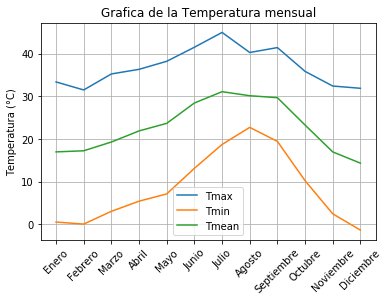

In [9]:
temp = df[["Tmax","Tmin","Tmean"]]
plt.plot(range(0,12),temp)
plt.title("Grafica de la Temperatura mensual")
plt.ylabel("Temperatura (°C)")
plt.legend(temp)
plt.grid()
plt.xticks(np.arange(len(mes)), mes, rotation = 45)
plt.show()

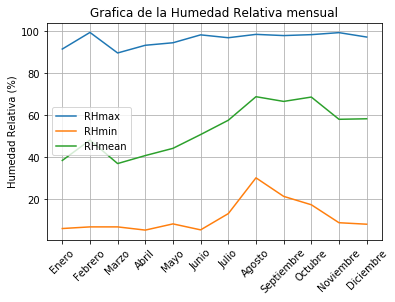

In [10]:
Humedad = df[["RHmax","RHmin","RHmean"]]
plt.plot(range(0,12),Humedad)
plt.title("Grafica de la Humedad Relativa mensual")
plt.ylabel("Humedad Relativa (%)")
plt.legend(Humedad)
plt.grid()
plt.xticks(np.arange(len(mes)), mes, rotation = 45)
plt.show()

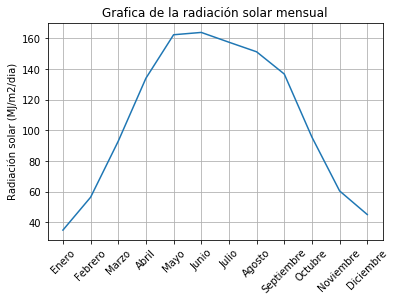

In [11]:
plt.plot(range(0,12),df["Rs"])
plt.title("Grafica de la radiación solar mensual")
plt.ylabel("Radiación solar (MJ/m2/dia)")
plt.grid()
plt.xticks(np.arange(len(mes)), mes, rotation = 45)
plt.show()

In [12]:
## Definimos las ecuaciones para obtener ET0 como funciones
## phi := latitud[rad]
def d(J):
    return 1+0.033*np.cos(2/365*np.pi*J)

def delta(J):
    return 0.409*np.sin(2*np.pi/365*J - 1.39)

def w(s):
    lat = 0.504725
    return np.arccos(-1*np.tan(lat)*np.tan(delta(s)))
    
def Ra(j):
    lat = 0.504725
    return 24*60/np.pi*(0.082)*d(j)*(w(j)*np.sin(lat)*np.sin(delta(j)) + np.cos(lat)*np.sin(w(j)))

def JH(t,rs):
    return (0.0252*t + 0.078) * rs

def val1(rs,tmean,phi,tmin):
    return ( 0.0393*rs*((tmean + 9.5)**(0.5)) - 0.19*rs**(0.6) * phi**(0.15) + 
             0.0061*(tmean + 20)*(1.12*tmean - tmin - 2)**(0.7) )
def val4(a,rs,tmean,dia,rh,u2,z):
    return (0.051*(1-a)*rs*(tmean + 9.5)**(0.5) - 2.4*(rs/Ra(dia))**2 + 
            0.048*(tmean + 20)*(1 - rh/100)*(0.5 + 0.536*u2) + 0.00012*z)

In [13]:

mvDia["Tmean"] = mv.groupby(["MES","DIA"])["AirTC_Avg"].transform("mean")
mvDia["Tmax"] = mv.groupby(["MES","DIA"])["AirTC_Avg"].transform("max")
mvDia["Tmin"] = mv.groupby(["MES","DIA"])["AirTC_Avg"].transform("min")
mvDia["RHmean"] = mv.groupby(["MES","DIA"])["RH"].transform("mean")
mvDia["RHmax"] = mv.groupby(["MES","DIA"])["RH"].transform("max")
mvDia["RHmin"] = mv.groupby(["MES","DIA"])["RH"].transform("min")
mvDia["Rs_mean"] = mv.groupby(["MES","DIA"])["Rn_Avg"].transform("mean")
mvDia["Albedo_mean"] = mv.groupby(["MES","DIA"])["albedo_Avg"].transform("mean")

mvDia = mvDia.drop_duplicates(["MES","DIA"]).reset_index(drop=True)
mvDia = mvDia.drop(mvDia.columns[0:18],1)
mvDia = mvDia.drop(mvDia.columns[1:17],1)

In [18]:
JHA = []
val1A = []
val4A = []
for i in mvDia.index:
    JHA.append( JH(mvDia["Tmean"][i],mvDia["Rs_mean"][i]) )
    val1A.append( val1(mvDia["Rs_mean"][i],mvDia["Tmean"][i],lat,mvDia["Tmin"][i]) )
    val4A.append( val4(mvDia["Albedo_mean"][i],mvDia["Rs_mean"][i],mvDia["Tmean"][i],mvDia["DoY"][i],mvDia["RHmean"][i],mvDia["WS_ms_S_WVT"][i],alt))
    
    
    

C:\Users\alfar\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in double_scalars


In [19]:
mvDia["JH"] = JHA
mvDia["Val1"] = val1A
mvDia["val4"] = val4A

In [23]:
mvDia["JH_mean"] = mvDia.groupby(["MES"])["JH"].transform("mean")
mvDia["val1_mean"] = mvDia.groupby(["MES"])["Val1"].transform("mean")
mvDia["val4_mean"] = mvDia.groupby(["MES"])["val4"].transform("mean")
mvDia = mvDia.drop_duplicates(["MES"]).reset_index(drop=True)

In [24]:
mvMes = pd.DataFrame({
    "JH_prom" : mvDia["JH_mean"],
    "Valiantzas1_prom" : mvDia["val1_mean"],
    "Valiantzas4_prom" : mvDia["val4_mean"]
})
mvMes.index = mes

In [26]:
mvMes


,JH_prom,Valiantzas1_prom,Valiantzas4_prom
Enero,-20.680677,NaN,-13.548884
Febrero,18.311362,6.650785,11.804089
Marzo,36.811304,13.989701,11.490558
Abril,57.320168,18.937884,19.783505
Mayo,84.497180,28.433828,17.660576
Junio,120.063321,35.559101,40.831634
Julio,136.562409,38.958340,33.378154
Agosto,154.882965,42.043257,46.989417
Septiembre,144.432366,39.308486,26.603535
Octubre,87.573797,24.677257,18.923811


In [29]:
fv.head()

,Year,DoY,Hour,NEE,LE,H,Rg,Tair,Tsoil,rH,...,Tsoil_fmeth,Tsoil_fwin,PotRad,FP_NEEnight,FP_Temp,E_0,R_ref,Reco,GPP_f,GPP_fqc
0,2018,7,0.5,2.56,11.52,-20.04,-0.87,16.51,20.99,43.83,...,-9999,-9999,0.0,-9999.0,16.51,207.66,0.92767,1.00713,-1.0729,1
1,2018,7,1.0,4.07,15.11,-7.34,-0.97,16.61,21.05,46.82,...,-9999,-9999,0.0,-9999.0,16.61,207.66,0.92767,1.01249,-0.9620,1
2,2018,7,1.5,0.92,8.61,-9.76,-0.96,16.07,21.09,46.65,...,-9999,-9999,0.0,-9999.0,16.07,207.66,0.92767,0.98371,-1.1643,1
3,2018,7,2.0,0.41,1.93,-8.55,-2.06,16.06,21.09,46.27,...,-9999,-9999,0.0,-9999.0,16.06,207.66,0.92767,0.98318,-1.1648,1
4,2018,7,2.5,0.31,6.40,-0.55,-1.32,15.81,21.10,47.76,...,-9999,-9999,0.0,-9999.0,15.81,207.66,0.92767,0.96997,-1.4929,1


In [30]:
DATA=(np.asarray(fv['Year']-1970, dtype='datetime64[Y]'))+(np.asarray(fv["DoY"], dtype='timedelta64[D]')-1)
fv["FECHA"] = DATA

In [31]:
# Se creau un dataframe con solo las variables necesarias
df = None
df=pd.DataFrame([])
df["FECHA"] = fv["FECHA"]
df["FECHA"] = pd.to_datetime(df["FECHA"])
df["AÑO"] = df["FECHA"].dt.year
df["MES"] = df["FECHA"].dt.month
df["DIA"] = df["FECHA"].dt.day
df["HORA"] = fv["Hour"]

df["RnG"] = fv["Rg_f"]
df["ET"] = fv["LE_f"]
df["H"] = fv["H_f"]

df.head()

,FECHA,AÑO,MES,DIA,HORA,RnG,ET,H
0,2018-01-07,2018,1,7,0.5,-0.87,11.52,-20.04
1,2018-01-07,2018,1,7,1.0,-0.97,15.11,-7.34
2,2018-01-07,2018,1,7,1.5,-0.96,8.61,-9.76
3,2018-01-07,2018,1,7,2.0,-2.06,1.93,-8.55
4,2018-01-07,2018,1,7,2.5,-1.32,6.40,-0.55


In [32]:
#Cortamos el dataframe a un mes; usaremos el mes de Abril
df = df[df["MES"] == 4]

In [33]:
df["RnG_mean"] = df.groupby(["HORA"])["RnG"].transform("mean")
df["ET_mean"] = df.groupby(["HORA"])["ET"].transform("mean")
df["H_mean"] = df.groupby(["HORA"])["H"].transform("mean")

df = df.drop_duplicates(["HORA"]).reset_index(drop=True)

df.head()

,FECHA,AÑO,MES,DIA,HORA,RnG,ET,H,RnG_mean,ET_mean,H_mean
0,2018-04-01,2018,4,1,0.5,-2.88,-6.35,-7.45,-2.682667,2.172333,-4.397333
1,2018-04-01,2018,4,1,1.0,-2.80,4.86,-10.22,-2.572667,2.762667,-6.065000
2,2018-04-01,2018,4,1,1.5,-2.20,6.48,-11.90,-2.647000,5.155000,-7.004667
3,2018-04-01,2018,4,1,2.0,-2.86,-0.74,-14.79,-2.285333,2.325000,-7.414667
4,2018-04-01,2018,4,1,2.5,-1.73,2.41,-22.88,-2.389333,4.269667,-10.122333


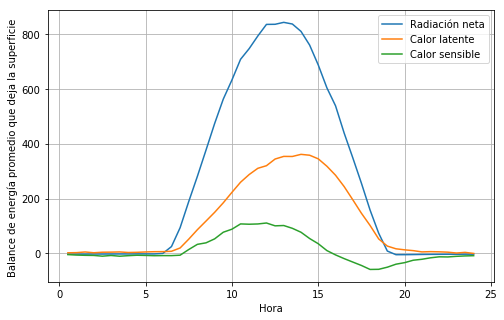

In [35]:
plt.figure(1, figsize=(8, 5))

plt.plot(df.HORA, df.RnG_mean)
plt.plot(df.HORA, df.ET_mean)
plt.plot(df.HORA, df.H_mean)

plt.ylabel("Balance de energía promedio que deja la superficie ")
plt.xlabel("Hora")
plt.gca().legend(('Radiación neta','Calor latente',"Calor sensible"))
plt.grid(True)
plt.savefig("BalEne", plt = 2000)
plt.show()